In [1]:
import matplotlib.pyplot as plt
import pandas as pd

idx = pd.IndexSlice

In [2]:
c = ['Poultry Meat', 'Freshwater Fish', 'Crustaceans', 'Eggs']

In [3]:
df = pd.read_csv('data/FAOSTAT_data_en_6-12-2024.csv')
df['Value'] = df.apply(lambda x: x['Value']*1000 if x['Unit']
                       == '1000 t' else x['Value'], axis=1)
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5511,Production,S2731,Bovine Meat,2010,2010,1000 t,131000.0,I,Imputed value
1,FBS,Food Balances (2010-),4,Afghanistan,5511,Production,S2731,Bovine Meat,2011,2011,1000 t,138000.0,I,Imputed value
2,FBS,Food Balances (2010-),4,Afghanistan,5511,Production,S2731,Bovine Meat,2012,2012,1000 t,139000.0,I,Imputed value
3,FBS,Food Balances (2010-),4,Afghanistan,5511,Production,S2731,Bovine Meat,2013,2013,1000 t,134000.0,I,Imputed value
4,FBS,Food Balances (2010-),4,Afghanistan,5511,Production,S2731,Bovine Meat,2014,2014,1000 t,121000.0,I,Imputed value


In [4]:
df['Element'].unique()

array(['Production', 'Import Quantity', 'Stock Variation',
       'Export Quantity', 'Domestic supply quantity'], dtype=object)

In [5]:
pt = df.pivot_table(index=['Area', 'Year'], columns=['Item', 'Element'], values='Value')
pt.head()

Item              Aquatic Animals, Others                                  \
Element          Domestic supply quantity Export Quantity Import Quantity   
Area        Year                                                            
Afghanistan 2010                      NaN             NaN             NaN   
            2011                      NaN             NaN             NaN   
            2012                      NaN             NaN             NaN   
            2013                      NaN             NaN             NaN   
            2014                      NaN             NaN             NaN   

Item                                                  Aquatic Plants  \
Element          Production Stock Variation Domestic supply quantity   
Area        Year                                                       
Afghanistan 2010        NaN             NaN                      NaN   
            2011        NaN             NaN                      NaN   
            2012        NaN             NaN                      NaN   
            2013        NaN             NaN                      NaN   
            2014        NaN             NaN                      NaN   

Item                                                         \
Element          Export Quantity Import Quantity Production   
Area        Year                                              
Afghanistan 2010             NaN             NaN        NaN   
            2011             NaN             NaN        NaN   
            2012             NaN             NaN        NaN   
            2013             NaN             NaN        NaN   
            2014             NaN             NaN        NaN   

Item                          Bovine Meat  ...                  Pigmeat  \
Element          Domestic supply quantity  ... Domestic supply quantity   
Area        Year                           ...                            
Afghanistan 2010                 134000.0  ...                      0.0   
            2011                 140000.0  ...                      NaN   
            2012                 134000.0  ...                      NaN   
            2013                 132000.0  ...                      NaN   
            2014                 163000.0  ...                   1000.0   

Item                                                                         \
Element          Export Quantity Import Quantity Production Stock Variation   
Area        Year                                                              
Afghanistan 2010             NaN             NaN        0.0             NaN   
            2011             NaN             NaN        NaN             NaN   
            2012             NaN             NaN        NaN             NaN   
            2013             NaN             NaN        NaN             NaN   
            2014             0.0          1000.0        NaN             NaN   

Item                         Poultry Meat                                  \
Element          Domestic supply quantity Export Quantity Import Quantity   
Area        Year                                                            
Afghanistan 2010                  65000.0             NaN         39000.0   
            2011                  56000.0             NaN         51000.0   
            2012                  62000.0             NaN         22000.0   
            2013                  67000.0             NaN         48000.0   
            2014                  69000.0             0.0         43000.0   

Item                                         
Element          Production Stock Variation  
Area        Year                             
Afghanistan 2010    28000.0          2000.0  
            2011    26000.0         20000.0  
            2012    25000.0        -16000.0  
            2013    26000.0          8000.0  
            2014    25000.0         -1000.0  

[5 rows x 114 columns]

In [6]:
z = pt.loc[idx[:, :], idx[c, 'Domestic supply quantity']] - \
    (pt.loc[idx[:, :], idx[c, 'Production']].values +
     pt.loc[idx[:, :], idx[c, 'Import Quantity']].values -
     pt.loc[idx[:, :], idx[c, 'Stock Variation']].values -
     pt.loc[idx[:, :], idx[c, 'Export Quantity']].values)
print(z.loc['China'].to_string())

Item                Poultry Meat          Freshwater Fish              Crustaceans                     Eggs
Element Domestic supply quantity Domestic supply quantity Domestic supply quantity Domestic supply quantity
Year                                                                                                       
2010                     -1000.0                      0.0                      0.0                      0.0
2011                         0.0                    -10.0                      0.0                  -1000.0
2012                      1000.0                      0.0                     10.0                      0.0
2013                         0.0                      0.0                      0.0                      0.0
2014                         0.0                      0.0                      0.0                      0.0
2015                         0.0                     10.0                      0.0                  -1000.0
2016                      10

In [7]:
print(pt.loc['China', 2021].to_string())

Item                     Element                 
Aquatic Animals, Others  Domestic supply quantity     1221860.0
                         Export Quantity                93250.0
                         Import Quantity               182340.0
                         Production                   1132770.0
                         Stock Variation                    0.0
Aquatic Plants           Domestic supply quantity    20619280.0
                         Export Quantity                30910.0
                         Import Quantity               297200.0
                         Production                  20353000.0
Bovine Meat              Domestic supply quantity    11289000.0
                         Export Quantity               137000.0
                         Import Quantity              3808000.0
                         Production                   7649000.0
                         Stock Variation                30000.0
Butter, Ghee             Domestic supply quantity     

In [8]:
i = pt.loc[idx[:, 2021], idx[:, 'Domestic supply quantity']].sum(
    axis=1).sort_values(ascending=False).index.get_level_values(0)

In [9]:
x = pt.loc[idx[i, :], idx[:, 'Import Quantity']] / \
    pt.loc[idx[i, :], idx[:, 'Domestic supply quantity']].values
x.head()

Item       Aquatic Animals, Others  Aquatic Plants     Bovine Meat  \
Element            Import Quantity Import Quantity Import Quantity   
Area  Year                                                           
China 2010                0.036736        0.012913        0.061406   
      2011                0.045373        0.016011        0.066397   
      2012                0.081722        0.016700        0.084397   
      2013                0.060958        0.019794        0.119442   
      2014                0.054868        0.017705        0.181488   

Item          Butter, Ghee     Cephalopods           Cream     Crustaceans  \
Element    Import Quantity Import Quantity Import Quantity Import Quantity   
Area  Year                                                                   
China 2010        0.335616        0.313879        1.062500        0.081522   
      2011        0.392638        0.326257        1.100000        0.080018   
      2012        0.427778        0.391870        1.041667        0.077776   
      2013        0.444444        0.428559        1.111111        0.078788   
      2014        0.528037        0.378055        1.020833        0.072288   

Item         Demersal Fish            Eggs Fats, Animals, Raw  ...  \
Element    Import Quantity Import Quantity    Import Quantity  ...   
Area  Year                                                     ...   
China 2010        0.157354        0.004143           0.133873  ...   
      2011        0.167354        0.004423           0.166628  ...   
      2012        0.339892        0.004758           0.160423  ...   
      2013        0.344702        0.004607           0.109103  ...   
      2014        0.357894        0.005957           0.124972  ...   

Item       Marine Fish, Other Meat, Aquatic Mammals     Meat, Other  \
Element       Import Quantity       Import Quantity Import Quantity   
Area  Year                                                            
China 2010           1.026813                   NaN        0.019521   
      2011           0.945891                   NaN        0.018135   
      2012           0.429076                   NaN        0.019590   
      2013           0.438759                   NaN        0.015957   
      2014           0.369794                   NaN        0.028961   

Item       Milk - Excluding Butter Molluscs, Other Mutton & Goat Meat  \
Element            Import Quantity Import Quantity    Import Quantity   
Area  Year                                                              
China 2010                0.184802        0.068055           0.028116   
      2011                0.213762        0.081336           0.032150   
      2012                0.247408        0.031545           0.038443   
      2013                0.308943        0.042665           0.067257   
      2014                0.299745        0.049305           0.072074   

Item        Offals, Edible    Pelagic Fish         Pigmeat    Poultry Meat  
Element    Import Quantity Import Quantity Import Quantity Import Quantity  
Area  Year                                                                  
China 2010        0.293695        0.702627        0.016283        0.105817  
      2011        0.301413        0.733448        0.024968        0.107874  
      2012        0.264448        0.747595        0.023988        0.091014  
      2013        0.266436        0.701227        0.025732        0.100086  
      2014        0.283934        0.714651        0.022194        0.094647  

[5 rows x 23 columns]

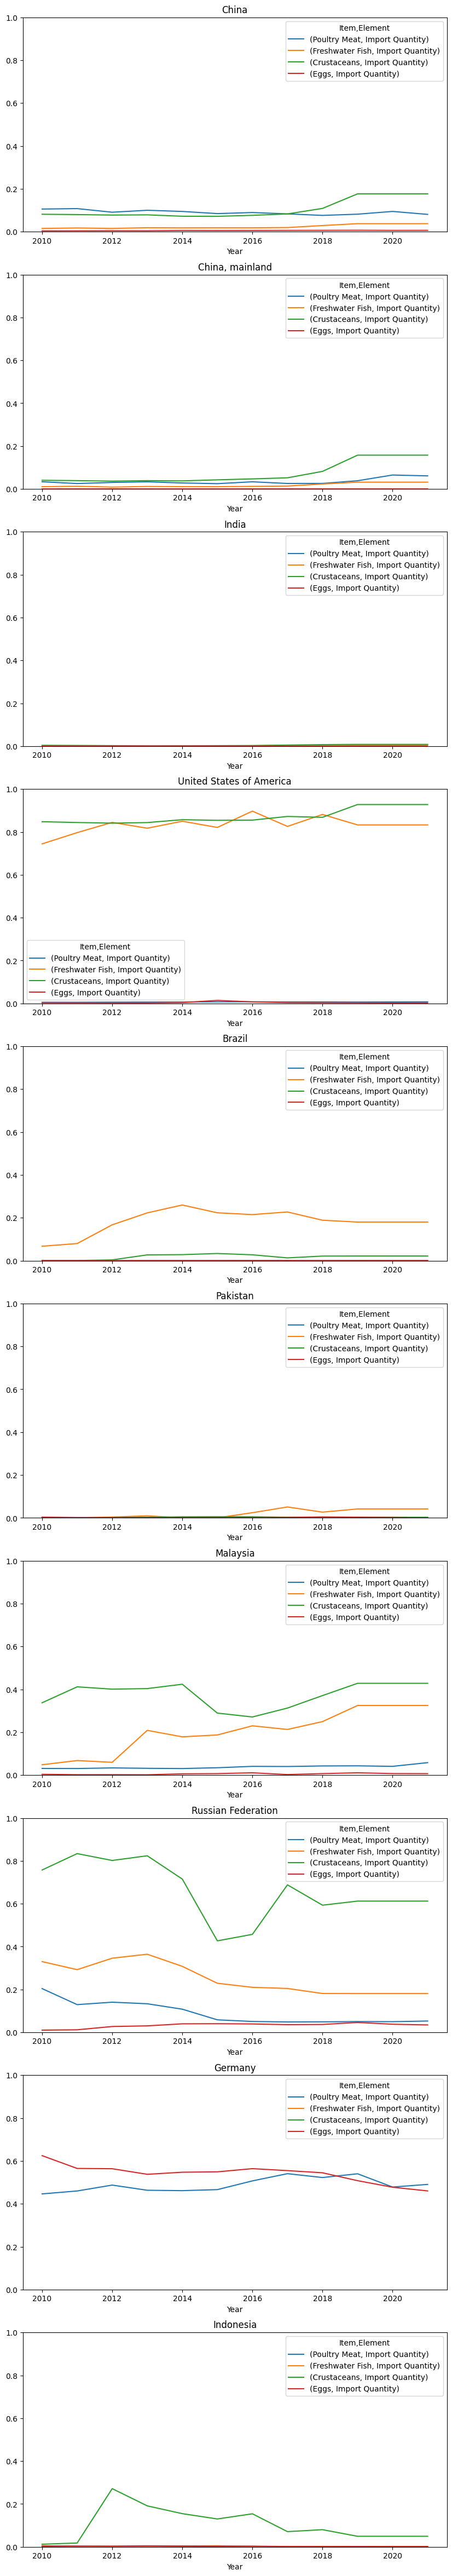

In [10]:
n = 10
y = x.loc[idx[i[:n], :], idx[c, :]]

fig, ax = plt.subplots(n, 1, figsize=(10, 6*n))
for j in range(n):
    y.loc[i[j]].plot(ax=ax[j], label=i[j])
    ax[j].set_title(i[j])
    ax[j].set_ylim(0, 1)
    # ax[j].legend().remove()